In [17]:
import netCDF4 as nc
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from pylibs.plot_utils import set_size, setupax_2dmap

In [36]:
def read_bit(value, bit_index):
    return (value >> bit_index) & 1

In [29]:
ncfile = '/glade/work/swei/data/RawOBS/NOAA_VIIRS_N20_AOD/JRR-AOD_v3r2_j01_s202407031322418_e202407031324046_c202407031404478.nc'
ncd = nc.Dataset(ncfile, 'r')

In [60]:
lats = ncd.variables['Latitude'][:].ravel()
lons = ncd.variables['Longitude'][:].ravel()
qcpath = ncd.variables['QCPath'][:].ravel()
vals = ncd.variables['AOD550'][:].ravel()

In [64]:
lsfs = np.zeros_like(lats, dtype=np.int32)

In [52]:
ocean_mask = ((qcpath >> 0 & 1) == 1)|((qcpath >> 2 & 1) == 1)

In [65]:
lsfs[ocean_mask] = 0
lsfs[~ocean_mask] = 1

In [32]:
area_corner = [lats.min(), lats.max(), lons.min(), lons.max()]

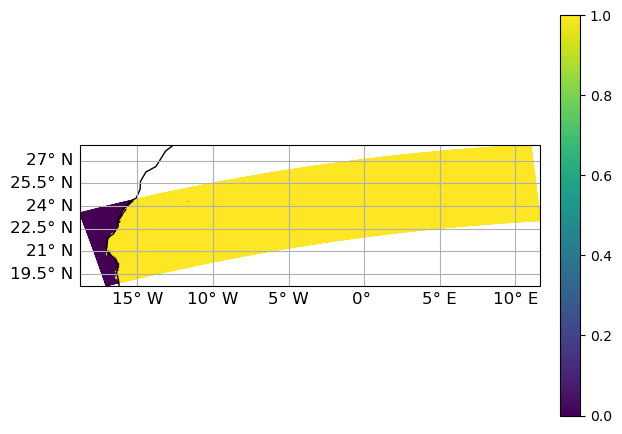

In [67]:
fig, ax, gl = setupax_2dmap(area_corner, None, ccrs.PlateCarree(), lbsize=12)
set_size(5,5)
sc = ax.scatter(lons, lats, c=lsfs, s=0.01)
plt.colorbar(sc, fraction=0.04, pad=0.04, aspect=20)